<a href="https://colab.research.google.com/github/celiaferreira/Covid19_RX/blob/master/7_1_DeepLearning_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 7.1 Modelos de deep learning - SMOTE

Esta secção apresenta modelos de **redes neuronais convolucionais** (CNN), uma das opções mais utilizadas para a classificação de imagens.
Inclui CNN:

* inicial, não otimizada
* com API funcional Keras
* com otimização de hiperparâmetros


### 7.1.1 CNN inicial- 4 labels
De seguida é apresentada uma CNN para classificar as imagens em:
* 0 - COVID-19
* 1 - Pneumonia viral
* 2 - Pneumonia bacteriana
* 3 - Normal

O modelo usa 3 camadas convolucionais de 32 filtros e tamanho do núcleo 3, intercaladas com camadas de pooling.

Epoch 00021: early stopping
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)       

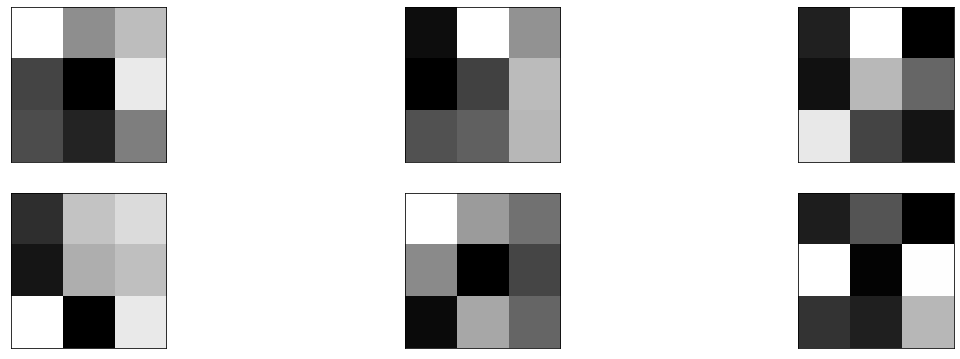

Predicted    0    1   2    3
Actual                      
0          294   12   5    8
1            4  553  55   27
2            1  168  92    4
3            7   31   2  844
accuracy total: 0.8462268628381585
precision covid: 0.9607843137254902
recall covid: 0.9216300940438872
precision total: 0.8094603225594643
recall total: 0.7722414367678736
label precision recall
    0     0.961  0.922
    1     0.724  0.865
    2     0.597  0.347
    3     0.956  0.955
2107/2107 [==============================] - 1s 318us/step
[0.41358001615744266, 0.8462268710136414]


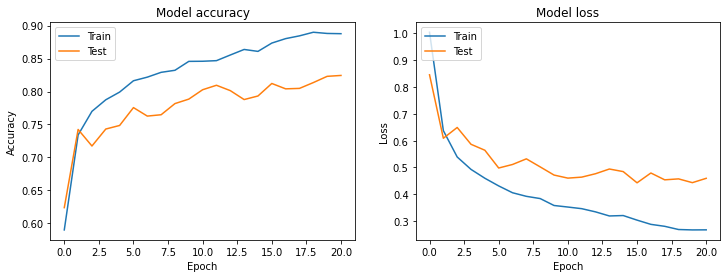

In [ ]:
model_cnn4 = models.Sequential()
model_cnn4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model_cnn4.add(layers.MaxPooling2D((2, 2)))
model_cnn4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn4.add(layers.MaxPooling2D((2, 2)))
model_cnn4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn4.add(layers.MaxPooling2D((2, 2)))

model_cnn4.add(layers.Flatten())
model_cnn4.add(layers.Dense(64, activation='relu'))
model_cnn4.add(layers.Dense(16, activation='relu'))
model_cnn4.add(layers.Dense(4, activation='softmax'))

model_cnn4.compile(optimizers.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_cnn4=model_cnn4.fit(X_over4, y_over4, epochs=50,validation_data=(X_val,y_val),callbacks = callbacks, verbose=0)
model_cnn4.summary()
tf.keras.utils.plot_model(model_cnn4, "model_cnn4.png", show_shapes = True)
camadas(model_cnn4)
output_metrics(model_cnn4,history_cnn4,X_test, y_test)

O modelo atinge uma **precisão global de 84,6%**, identificando **92,2% dos casos COVID-19**.

Os gráficos evidienciam ainda overfitting.

A matriz de confusão evidencia também que o erro está essencialmente associado à capacidade do modelo distinguir pneumonia viral de bacteriana, à semelhança dos modelos de machine learning.





### 7.1.2 CNN inicial- 3 labels

Como o maior erro está associado à dificuldade de separação entre pneumonia viral e bacteriana, e não sendo este o objetivo principal do projeto, treinam-se nesta secção o modelo anterior mas com as seguintes labels:
* 0- Covid-19
* 1- Outra pneumonia (viral ou bacteriana)
* 2- Normal

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16928)            

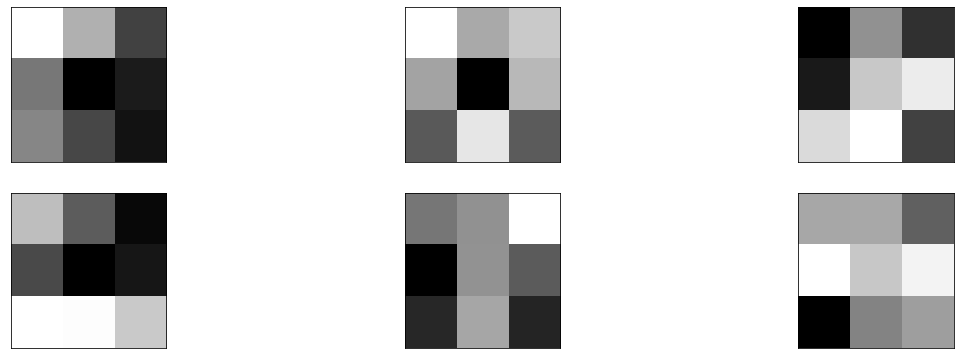

Predicted    0    1    2
Actual                  
0          292   25    2
1            8  889    7
2           11  107  766
accuracy total: 0.92406264831514
precision covid: 0.9389067524115756
recall covid: 0.9153605015673981
precision total: 0.9326696114980968
recall total: 0.9217611394391628
label precision recall
    0     0.939  0.915
    1     0.871  0.983
    2     0.988  0.867
2107/2107 [==============================] - 1s 331us/step
[0.20858113190462424, 0.9240626692771912]


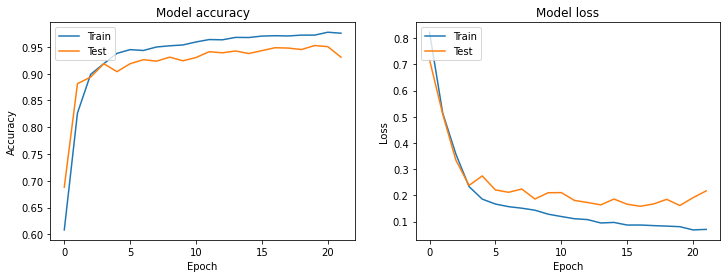

In [ ]:
model_cnn3 = models.Sequential()
model_cnn3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model_cnn3.add(layers.MaxPooling2D((2, 2)))
model_cnn3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn3.add(layers.MaxPooling2D((2, 2)))
model_cnn3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn3.add(layers.MaxPooling2D((2, 2)))

model_cnn3.add(layers.Flatten())
model_cnn3.add(layers.Dense(64, activation='relu'))
model_cnn3.add(layers.Dense(16, activation='relu'))
model_cnn3.add(layers.Dense(3, activation='softmax'))
model_cnn3.compile(optimizers.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_cnn3.summary()

tf.keras.utils.plot_model(model_cnn3, "model_cnn3.png", show_shapes = True)
history_cnn3=model_cnn3.fit(X_over3, y_over3, epochs=50,validation_data=(X_val,y_val3),callbacks = callbacks, verbose=0)
camadas(model_cnn3)
output_metrics(model_cnn3,history_cnn3,X_test, y_test3)

Com a agregação das pneumonias viral e bacteriana numa única classe, a **performance global aumenta de 83,7% para 92,4%**. Os gráficos da precisão e loss evidenciam um ligeiro overfitting, a corrigir nas experiências seguintes.

---
**Constata-se que, em todos os modelos testados, a accuracy global é superior no caso de o target apresentar 3 labels em vez de 4 labels, pelo que os modelos seguintes serão desenvolvidos com 3 labels.**

---


Experiências adicionais sobre parâmetros como a topologia e a velocidade de aprendizagem, serão concretizadas abaixo na **otimização de hiperparâmetros**.

### 7.1.3 CNN com API funcional

Esta secção inclui estruturas mais complexas (que as sequenciais) de CNN, recorrendo à API funcional do Keras.
São testados múltiplos extratores de features, assim como de camadas fully-connected.



---



---


 **Versão 1**

 Este modelo inclui 2 camadas extratoras de features:

 * a primeira intercala camadas convolucionais de 64 filtros com camadas de MaxPooling
 * a segunda intercala camadas convolucionais de 32 filtros com camadas de AveragePooling

A camada fully connected é composta por 3 camadas dense de 128, 64 e 32 neurónios.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 1)  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 197, 197, 64) 1088        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 197, 197, 32) 544         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 98, 98, 64)   0           conv2d_10[0][0]                  
____________________________________________________________________________________________

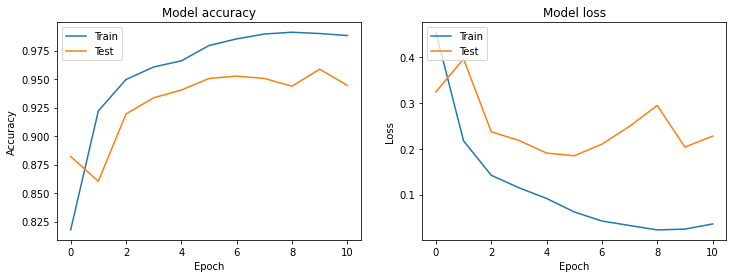

In [ ]:
visible = Input(shape=(200,200,1))
# first feature extractor
conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(64, kernel_size=4, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat1 = Flatten()(pool3)
# second feature extractor
conv2_1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool2_1 = AveragePooling2D(pool_size=(2, 2))(conv2_1)
conv2_2 = Conv2D(32, kernel_size=4, activation='relu')(pool2_1)
pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_2)
conv2_3 = Conv2D(32, kernel_size=4, activation='relu')(pool2_2)
pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_3)
flat2 = Flatten()(pool2_2)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(128, activation='relu')(merge)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)    
# prediction output
output = Dense(3, activation='softmax')(hidden3)

model_api1 = Model(inputs=visible, outputs=output)
model_api1.compile(optimizers.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_api1.summary()
tf.keras.utils.plot_model(model_api1, "model_api1.png", show_shapes = True)
history_api1=model_api1.fit(X_over3, y_over3, epochs=50,validation_data=(X_val,y_val3),callbacks = callbacks, verbose=0)
output_metrics(model_api1,history_api1,X_test, y_test3)

A primeira API funcional resulta numa precisão global de 94,9%. Porém, com overfitting.



---



**Versão 2**

Esta verão mantém as 2 camadas extratoras de features da versão anterior:

 * a primeira intercala camadas convolucionais de 64 filtros com camadas de MaxPooling
 * a segunda intercala camadas convolucionais de 32 filtros com camadas de AveragePooling

Porém, a camada fully connected é composta por 2 componentes, posteriormente concatenadas:

* 7 layers dense de 128, 64, 32, 16, 32, 16 e 8 neurónios
* 4 layers dense de 128, 64, 32 e 32 neurónios.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 200, 200, 1)  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 197, 197, 64) 1088        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 197, 197, 32) 544         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 98, 98, 64)   0           conv2d_16[0][0]                  
____________________________________________________________________________________________

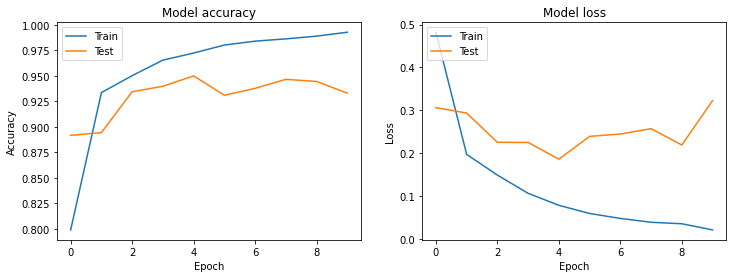

In [ ]:
visible = Input(shape=(200,200,1))
# first feature extractor
conv1 = Conv2D(64, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(64, kernel_size=4, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat1 = Flatten()(pool3)
# second feature extractor

conv2_1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool2_1 = AveragePooling2D(pool_size=(2, 2))(conv2_1)
conv2_2 = Conv2D(32, kernel_size=4, activation='relu')(pool2_1)
pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_2)
conv2_3 = Conv2D(32, kernel_size=4, activation='relu')(pool2_2)
pool2_2 = AveragePooling2D(pool_size=(2, 2))(conv2_3)
flat2 = Flatten()(pool2_2)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(128, activation='relu')(merge)
hidden2 = Dense(64, activation='relu',)(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)
hidden4 = Dense(16, activation='relu')(hidden3)
hidden5 = Dense(32, activation='relu')(hidden4)
hidden6 = Dense(16, activation='relu')(hidden5)
hidden7 = Dense(8, activation='relu')(hidden6)

hidden1_1 = Dense(128, activation='relu')(merge)
hidden2_1 = Dense(64, activation='relu')(hidden1_1)
hidden3_1 = Dense(32, activation='relu')(hidden2_1)
hidden4_1 = Dense(32, activation='relu')(hidden3_1)
concatenated = concatenate([hidden3, hidden4_1])
output = Dense(3, activation='sigmoid')(concatenated)

model_api2 = Model(inputs=visible, outputs=output)

model_api2.compile(optimizers.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_api2.summary()
tf.keras.utils.plot_model(model_api2, "model_api2.png", show_shapes = True)
history_api2=model_api2.fit(X_over3, y_over3, epochs=50,validation_data=(X_val,y_val3),callbacks = callbacks, verbose=0)
output_metrics(model_api2,history_api2,X_test, y_test3)


O modelo apresenta uma performance de 94,4%. É um modelo mais complexo, mas não supera a performance global do modelo anterior, mais simples. Identifica 95,9% dos casos COVID, comparando com 95,0% da versão anterior. 
Assim, a complexidade extra acrescida por esta API não foi vantajosa.



---



**Versão 3**

Esta verão mantém 2 camadas extratoras de features:

 * a primeira intercala camadas convolucionais de 64 filtros com camadas de MaxPooling
 * a segunda intercala camadas convolucionais de 64 e 128 filtros com camadas de MaxPooling e BatchNormalization (normalização das saídas das camadas internas, ajuda à convergência do algoritmo de treino e tem um
pequeno efeito contra o sobre-ajustamento). Contém ainda camadas de dropout.

A camada fully connected é composta por 3 camadas dense de 128, 64 e 32 neurónios.

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 200, 200, 1)  0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 198, 198, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 198, 198, 64) 256         conv2d_25[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_19 (MaxPooling2D) (None, 99, 99, 64)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

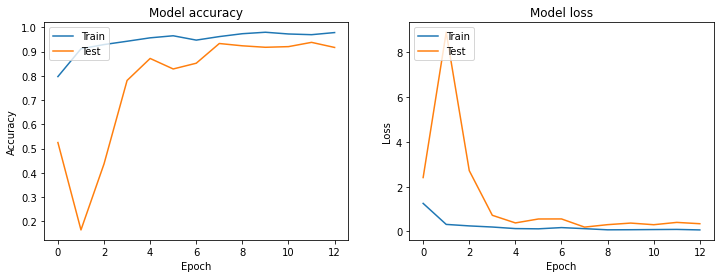

In [ ]:
visible = Input(shape=(200,200,1))
# first feature extractor
conv1 = Conv2D(64, kernel_size=3, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(64, kernel_size=3, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat1 = Flatten()(pool3)

# second feature extractor
conv2_1 = Conv2D(64, kernel_size=3, activation='relu')(visible)
batc2_1= BatchNormalization()(conv2_1)
pool2_1 = MaxPooling2D(pool_size=(2, 2))(batc2_1)
drop2_1=Dropout(0.5)(pool2_1)
conv2_2 = Conv2D(64, kernel_size=3, activation='relu')(drop2_1)
batc2_2= BatchNormalization()(conv2_2)
conv2_3 = Conv2D(64, kernel_size=3, activation='relu')(batc2_2)
batc2_3= BatchNormalization()(conv2_3)
pool2_2 = MaxPooling2D(pool_size=(2, 2))(batc2_3)
drop2_2=Dropout(0.5)(pool2_2)
conv2_4 = Conv2D(128, kernel_size=4, activation='relu')(drop2_2)
batc2_3= BatchNormalization()(conv2_4)
conv2_5 = Conv2D(128, kernel_size=4, activation='relu')(batc2_3)
batc2_4= BatchNormalization()(conv2_5)
pool2_3 = MaxPooling2D(pool_size=(2, 2))(batc2_4)
drop2_3=Dropout(0.5)(pool2_3)

flat2 = Flatten()(pool2_3)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
drop2_4=Dropout(0.5)(merge)
hidden1 = Dense(128, activation='relu')(drop2_4)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)    
# prediction output
output = Dense(3, activation='softmax')(hidden3)
model_api3 = Model(inputs=visible, outputs=output)
model_api3.compile(optimizers.Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_api3.summary()
tf.keras.utils.plot_model(model_api3, "model_api3.png", show_shapes = True)
history_api3=model_api3.fit(X_over3, y_over3, epochs=50,validation_data=(X_val,y_val3),callbacks = callbacks, verbose=0)
output_metrics(model_api3,history_api3,X_test, y_test3)

Este modelo apresenta uma performance global de 91,0%, um pouco mais baixa que os anteriores. Porém é o que apresenta menos overfitting (modelo menos complexo, com camadas de dropout), garantindo **maior capacidade de generalização**.


### 7.1.4 Otimização hiperparâmetros

Efetua-se nesta secção um processo de **otimização de hipermparâmetros**, de modo a aumentar a performance dos modelos, identificando quais os parâmetros mais adequados e que garantem uma precisão ótima.

Começamos por definir a função que alojará as várias topologias (convolucionais, pooling, dropout) e a taxa de dropout:

In [ ]:
def setup_model(topo_c, topo_p, dropout_rate, input_size, output_size):
  model = Sequential()
  model.add(Conv2D(topo_c[0], (3, 3), activation='relu', input_shape=(200,200,1)))
  if topo_p[0]==1: model.add(MaxPooling2D((2, 2)))
  if dropout_rate > 0: model.add(Dropout(dropout_rate))
  for i in range(1,len(topo_c)):
    model.add(Conv2D(topo_c[i], (3, 3), activation='relu'))
    if topo_p[i]==1: model.add(MaxPooling2D((2, 2)))
    if dropout_rate > 0: model.add(Dropout(dropout_rate))
  model.add(layers.Flatten())
  if dropout_rate > 0: model.add(Dropout(dropout_rate))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  return model

Na sequência define-se uma função que incorpora os vários algoritmos de treino, a loss e a métrica a usar, o número de epochs e o batch size:

In [ ]:
def train_cnn(model, alg, lr, Xtrain, Ytrain, Xval, Yval, epochs, batch_size):
  if alg == "adam":
    optimizer = optimizers.Adam(lr = lr)
  elif alg == "rmsprop":
    optimizer = optimizers.RMSprop(lr = lr)
  elif alg == "sgd_momentum":
   optimizer = optimizers.SGD(lr = lr, momentum = 0.9)
  else: optimizer = optimizers.SGD(lr = lr)

  model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
  history=model.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs = epochs, batch_size = batch_size, verbose = 0,callbacks = callbacks)
  return model,history

A última função vai treinando os vários modelos, guardando configuração com a melhor performance:

In [ ]:
def cnn_optimization(opt_params, Xtrain, Ytrain, Xval, Yval, iterations, verbose = True):
  #verbose: producing detailed logging information
  from random import choice
  if verbose: print("Topology\tDropout\tAlgorithm\tLRate\tBatchSize\tEpochs\tValLoss\tValAcc\n")
  best_acc = None
  input_size = Xtrain.shape[0]
  output_size = Ytrain.shape[0]

  if "topology_c" in opt_params: topologies_c = opt_params["topology_c"]
  else: topologies_c = [[64,64,64]]
  if "topology_p" in opt_params: topologies_p = opt_params["topology_p"]
  else: topologies_p = [[1,1,1]]
  if "algorithm" in opt_params: algs = opt_params["algorithm"]
  else: algs = ["adam"]
  if "lr" in opt_params: lrs = opt_params["lr"]
  else: lrs = [0.001]
  if "dropout" in opt_params: dropouts = opt_params["dropout"]
  else: dropouts= [0.0]
  if "batch_size" in opt_params: batch_sizes = opt_params["batch_size"]
  else: batch_sizes= [512]
  if "epochs" in opt_params: epoch = opt_params["epochs"]
  else: epoch= [5]

  for it in range(iterations):
    #print('Iteração', it+1, 'de', iterations)
    #random item from the list
    topo_c = choice(topologies_c)
    topo_p = choice(topologies_p)   
    dropout_rate = choice(dropouts)
    dnn = setup_model (topo_c,topo_p, dropout_rate, input_size, output_size)
    alg = choice(algs)
    lr = choice(lrs)
    bs=choice(batch_sizes)
    epo=choice(epoch)

    dnn, history = train_cnn(dnn, alg, lr, Xtrain, Ytrain,Xval,Yval, epo, bs)
    val_loss, val_acc = dnn.evaluate(Xval, Yval, verbose = 0)
    #if verbose:
    print(topo_c, "\t", topo_p, "\t", dropout_rate, "\t", alg, "\t", lr, "\t", bs, "\t", epo, "\t", val_loss, "\t", val_acc)
    #config = (topo_c, topo_p, dropout_rate, alg, lr, bs, epo, val_loss, val_acc)
    if best_acc is None or val_acc > best_acc:
      best_acc = val_acc
      best_config = (topo_c, topo_p, dropout_rate, alg, lr, bs, epo)

      best_model=dnn
      best_history=history
  print("\t")
  print("BestTopology\tBestDropout\tBestAlgorithm\tBestLRate\tBestBatchSize\tBestEpochs\tBestValLoss\tBestValAcc\n")
  print(best_config, "\t", best_acc)
  return best_config, best_acc,best_model,best_history

Listam-se os hiperparâmetros a otimizar:

In [ ]:
opt_pars = {
     "topology_c":[[64,64,64], [32,64,128], [64,64,64,128,128]],
     "topology_p":[[1,1,1,1,1], [1,0,1,0,1]],#pooling constante ou intercalado
     "algorithm": ["adam","RMSprop"],
     "lr": [0.01, 0.001, 0.0001,0.00001], 
     "dropout": [0, 0.2, 0.5],
     "batch_size":  [64],
     "epochs":[30]}

E inicia-se o treino dos modelos e a seleção do mais preditivo:

In [ ]:
#best_config, best_val_acc,best_model,best_history=cnn_optimization(opt_pars, X_train2, y_train2, X_val2, y_val2, 30,verbose = True)
best_config, best_val_acc,best_model,best_history=cnn_optimization(opt_pars,X_over3, y_over3, X_val,y_val3, 20,verbose = True)

Topology	Dropout	Algorithm	LRate	BatchSize	Epochs	ValLoss	ValAcc

[64, 64, 64, 128, 128] 	 [1, 1, 1, 1, 1] 	 0 	 RMSprop 	 0.001 	 64 	 30 	 1.0910008237321498 	 0.493559330701828
[64, 64, 64] 	 [1, 1, 1, 1, 1] 	 0.2 	 RMSprop 	 0.001 	 64 	 30 	 0.3664184370687452 	 0.8759322166442871
Epoch 00027: early stopping
[32, 64, 128] 	 [1, 0, 1, 0, 1] 	 0.5 	 adam 	 0.001 	 64 	 30 	 0.21173674646070448 	 0.9450847506523132
Epoch 00011: early stopping
[64, 64, 64] 	 [1, 1, 1, 1, 1] 	 0 	 adam 	 0.001 	 64 	 30 	 0.23461116435164112 	 0.9477965831756592
Epoch 00025: early stopping
[64, 64, 64] 	 [1, 1, 1, 1, 1] 	 0 	 adam 	 0.0001 	 64 	 30 	 0.19111704121201725 	 0.9437288045883179
[64, 64, 64, 128, 128] 	 [1, 1, 1, 1, 1] 	 0.2 	 adam 	 0.0001 	 64 	 30 	 0.19998967498035755 	 0.9369491338729858
Epoch 00006: early stopping
[64, 64, 64] 	 [1, 0, 1, 0, 1] 	 0.5 	 RMSprop 	 1e-05 	 64 	 30 	 1.0926924720861144 	 0.45152541995048523
Epoch 00024: early stopping
[64, 64, 64, 128, 128] 	 [1, 1, 1, 1

In [ ]:
best_model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 198, 198, 64)      640       
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 99, 99, 64)        0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_74 (Dropout)         (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 46, 46, 64)      

Das hipóteses testadas, identifica-se como mais preditivo (precisão 95,4%) um modelo com:
* 3 camadas convolucionais de 64 filtros, intercaladas com camadas de pooling
* 50% de dropout
* algoritmo de treino: Adam
* velocidade de aprendizagem: 0.001

Para os parâmetros ótimos de algoritmo, batch-size e learning-rate selecionados, testam-se algumas topologias adicionais:

In [ ]:
opt_pars = {
     "topology_c":[[64,64],[64,64,64], [32,32,32], [128,128,128], [32,64,128], [64,64,128], [64,64,64,128,128]],
     "topology_p":[[1,1,1,1,1], [1,0,1,0,1]],#pooling constante ou intercalado
     "algorithm": ["adam"],
     "lr": [0.001], 
     "dropout": [0, 0.2, 0.5],
     "batch_size":  [64],
     "epochs":[30]
     }

In [ ]:
best_config, best_val_acc,best_model,best_history=cnn_optimization(opt_pars,X_over3, y_over3, X_val,y_val3, 10,verbose = True)

Topology	Dropout	Algorithm	LRate	BatchSize	Epochs	ValLoss	ValAcc

Epoch 00015: early stopping
[32, 32, 32] 	 [1, 1, 1, 1, 1] 	 0.5 	 adam 	 0.001 	 64 	 30 	 0.2578825175560127 	 0.9396610260009766
Epoch 00010: early stopping
[128, 128, 128] 	 [1, 1, 1, 1, 1] 	 0 	 adam 	 0.001 	 64 	 30 	 0.17734839005373326 	 0.9572881460189819
Epoch 00020: early stopping
[64, 64, 64] 	 [1, 0, 1, 0, 1] 	 0.5 	 adam 	 0.001 	 64 	 30 	 0.1859690311058598 	 0.9362711906433105
Epoch 00012: early stopping
[128, 128, 128] 	 [1, 0, 1, 0, 1] 	 0.2 	 adam 	 0.001 	 64 	 30 	 0.23668651722671497 	 0.9369491338729858
Epoch 00030: early stopping
[64, 64, 64, 128, 128] 	 [1, 1, 1, 1, 1] 	 0.2 	 adam 	 0.001 	 64 	 30 	 0.1477427331398397 	 0.9545762538909912
Epoch 00014: early stopping
[64, 64, 128] 	 [1, 0, 1, 0, 1] 	 0.2 	 adam 	 0.001 	 64 	 30 	 0.17824506306734678 	 0.9566101431846619
Epoch 00011: early stopping
[32, 64, 128] 	 [1, 1, 1, 1, 1] 	 0 	 adam 	 0.001 	 64 	 30 	 0.22751994006462017 	 0.930169463

Nesta fase, também fruto da pesquisa aleatória, foi identificado um modelo otimizado com uma precisão de 96% no validation set, com as seguintes características:
* 3 camadas convolucionais de 128 filtros cada, intercaladas com camadas de maxpooling
* sem dropout
* algoritmo de treino: Adam
* velocidade de aprendizagem: 0.001

Para os hiperparâmetros ótimos, avalliou-se a performance global no conjunto de teste, tendo-se atingido os 95,8% de precisão:

Predicted    0    1    2
Actual                  
0          311   14    5
1            2  881   20
2            1   41  832
accuracy total: 0.9606074988134788
precision covid: 0.9904458598726115
recall covid: 0.9424242424242424
precision total: 0.9675045491746098
recall total: 0.9566686962834053
label precision recall
    0     0.990  0.942
    1     0.941  0.976
    2     0.971  0.952
2107/2107 [==============================] - 2s 799us/step
[0.1563991099546518, 0.9606074690818787]


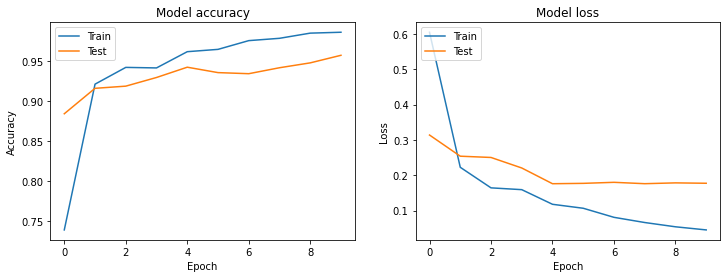

In [ ]:
output_metrics(best_model,best_history,X_test, y_test3)

Os gráficos não evidencial overfitting significativo, obtendo-se uma precisão global de 96,1% noo conjunto de teste.


Treina-se de seguida a melhor configuração identificada para o modelo num conjunto de dados que engloba os dados de treino e validação.

In [ ]:
#unir treino e validação para uma última corrida com o modelo ótimo
X_train_total=np.append(X_over3,X_val)
y_train_total=np.append(y_over3,y_val3)
X_train_total=X_train_total.reshape(X_over3.shape[0]+X_val.shape[0],200,200,1)
y_train_total=y_train_total.reshape(y_over3.shape[0]+y_val3.shape[0],)
print(X_over3.shape )
print(X_val.shape )
print(X_train_total.shape)
print(y_train_total.shape)

(4476, 200, 200, 1)
(1475, 200, 200, 1)
(5951, 200, 200, 1)
(5951,)


In [ ]:
print("Best configuration:", best_config)
print("Best validation accuracy:", best_val_acc)
best_model2 = setup_model(best_config[0], best_config[1],best_config[2], X_train_total.shape[0],y_train_total.shape[0])

best_model2, best_history2 = train_cnn(best_model2, best_config[3], best_config[4], X_train_total,y_train_total,X_val,y_val3,best_config[5],50)
test_loo, test_acc = best_model2.evaluate(X_test, y_test3, verbose = 0)
print("Test set metrics:", test_loo, test_acc)

Best configuration: ([128, 128, 128], [1, 1, 1, 1, 1], 0, 'adam', 0.001, 64, 30)
Best validation accuracy: 0.9572881460189819
Epoch 00029: early stopping
Test set metrics: 0.198362748243198 0.9729472994804382


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 198, 198, 128)     1280      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 99, 99, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 97, 97, 128)       147584    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 46, 46, 128)       147584    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 67712)           

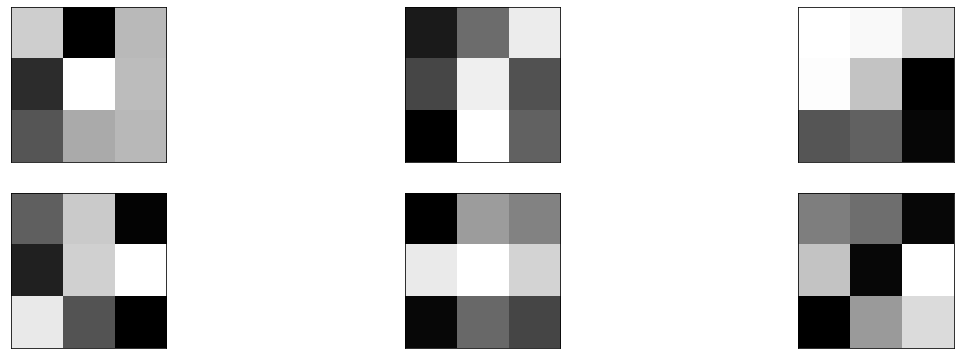

Predicted    0    1    2
Actual                  
0          324    5    1
1            3  874   26
2            0   22  852
accuracy total: 0.9729473184622687
precision covid: 0.9908256880733946
recall covid: 0.9818181818181818
precision total: 0.9767140869537698
recall total: 0.9748437951513891
label precision recall
    0     0.991  0.982
    1     0.970  0.968
    2     0.969  0.975
2107/2107 [==============================] - 2s 815us/step
[0.198362748243198, 0.9729472994804382]


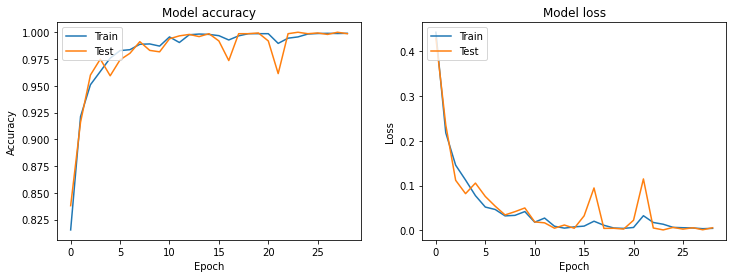

In [ ]:
best_model2.summary()
camadas(best_model2)
output_metrics(best_model2,best_history2,X_test, y_test3)

O modelo final, avaliado no conjunto de teste, apresenta uma **performance global de 97,3%**, identificando **98,1% dos casos COVID-19**. Constata-se ausência de overfitting pelo que o modelo terá elevada capacidade de generaização.

### 7.1.5 Previsão Covid-19 
Para o modelo ótimo, visualizam-se agora as classificações COVID-19 corretas e incorretas, de modo a perceber as ineficiências da aprendizagem.

#### A. Identificação correta

De seguida apresentam-se imagens COVID-19 classificadas como tal pelo modelo ótimo.

COVID-19 bem identificado:  324 RX em 330


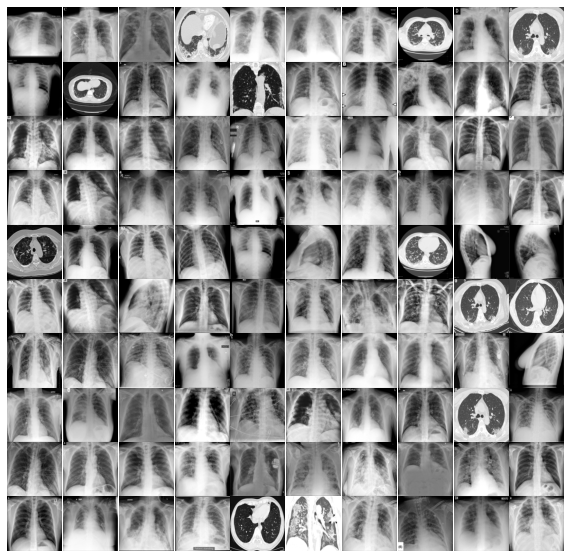

In [ ]:
y_pred_3class=np.argmax(best_model2.predict(X_test),axis=1)
index1=[]
for i in range(0,len(y_test3),1):
  if (y_test3[i] ==0 & y_test3[i] == y_pred_3class[i]):
    index1.append(i)
plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('COVID-19 bem identificado: ', len(index1) , 'RX em',len(np.where(y_test3==0)[0]))
for l in index1[:100]:    
    plt.subplot(10, 10, i_+1) 
    i_ += 1
    im = X_test[l]
    im = im[:,:,0]
    plt.imshow(im, cmap="gray")
    plt.axis('off')   

#### B. Identificado como outra pneumonia
De seguida apresentam-se imagens COVID-19 classificadas como outro tipo de pneumonia. Apesar de um erro, não é dos mais graves.

COVID-19 identificado como outra pneumonia:  5 RX em 330


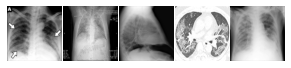

In [ ]:
index1=[]
for i in range(0,len(y_test3),1):
  if ((y_test3[i] ==0) & (y_pred_3class[i] ==1)):
    index1.append(i)
plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('COVID-19 identificado como outra pneumonia: ', len(index1) , 'RX em',len(np.where(y_test3==0)[0]))
for l in index1[:169]:
    plt.subplot(10, 10, i_+1) 
    i_ += 1
    im = X_test[l]
    im = im[:,:,0]
    plt.imshow(im, cmap="gray")
    plt.axis('off')   

* algumas das imagens Covid não identificadas aparecem numa postura atípica num RX, assim como com má qualidade.
* Porém, o erro mais grave é marcar o COVID-19 como uma situação normal (**apenas 1 caso**), representado na imagem seguinte.

#### C. Identificado como normal
Esta última secção apresenta imagens COVID-19 classificadas como normais. Este é o erro mais grave do modelo, incidindo porém em poucos casos.

COVID-19 marcado como normal:


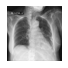

In [ ]:
index2=[]
for i in range(0,len(y_test3),1):
  if ((y_test3[i] ==0) & (y_pred_3class[i]==2)):
    index2.append(i)
plt.subplots_adjust(wspace=0, hspace=0)
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
print('COVID-19 marcado como normal:')
for l in index2[:169]:
    #print(i_)    
    plt.subplot(10, 10, i_+1) #.set_title(l)
    i_ += 1
    im = X_test[l]
    im = im[:,:,0]
    plt.imshow(im, cmap="gray")
    plt.axis('off')


### 7.1.6 Visualização

Esta secção apresenta visualizações das convoluções e da aprendizagem feita pelo modelo ótimo.

Começamos por selecionar uma imagem Covid-19 para analisar.

In [ ]:
def covid_image():
  for j in range(0,len(y_all),1):
    if (y_test[j]==0): #covid19
        cov_index=j
        break
  return cov_index

In [ ]:
#select Covid19 image
cov_index=covid_image()
# load the image with the required shape
img_covid=X_all[cov_index]
img_covid.shape

(200, 200, 1)

#### A. Imagem original e convolucionada

In [ ]:
from scipy.signal import convolve2d
import numpy as np 
import cv2
from matplotlib import pyplot as plt

def convolved_image(kernel, img):
    convolved = convolve2d(img, kernel)
    fig = plt.figure(figsize=(15, 15))
    plt.subplot(121)
    plt.title('Original image')
    plt.axis('off')
    plt.imshow(np.real(img), cmap='gray')
 
    plt.subplot(122)
    plt.title('Convolved image')
    plt.axis('off')
    plt.imshow(convolved, cmap='gray')
    return convolved

In [ ]:
img_covid2 = img_covid.reshape(200,200)
img_covid2.shape

(200, 200)

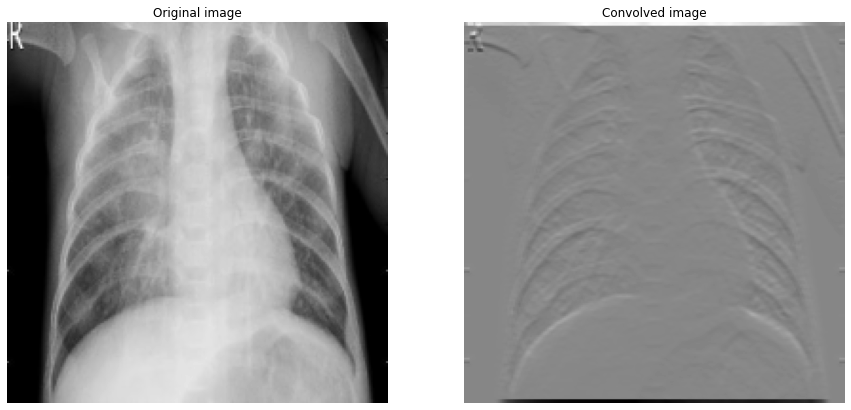

In [ ]:
# edges horizontais
kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], np.float32)
output = convolved_image(kernel, img_covid2)

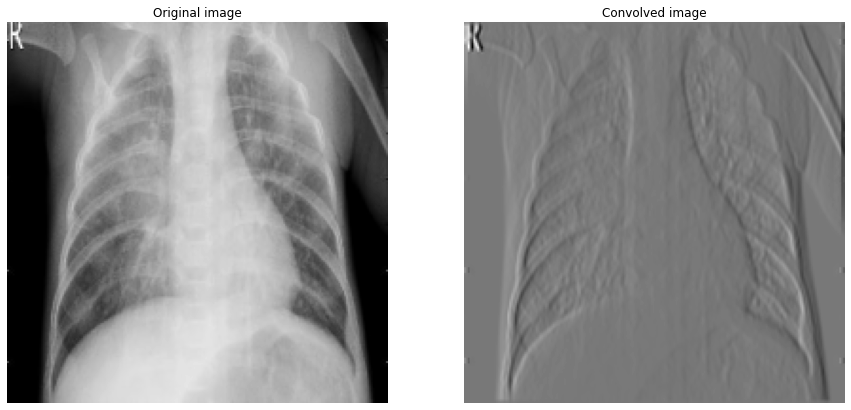

In [ ]:
# edges verticais
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], np.float32)
output = convolved_image(kernel, img_covid2)

#### B. Hidden layers

As imagens abaixo ilustram a aprendizagem da rede nas camadas de feature extraction para o modelo otimizado. É visível o aumento do nível de abstração nas camadas mais profundas.

In [ ]:
best_model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 198, 198, 128)     1280      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 99, 99, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 97, 97, 128)       147584    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 46, 46, 128)       147584    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 67712)           

(1, 200, 200, 1)


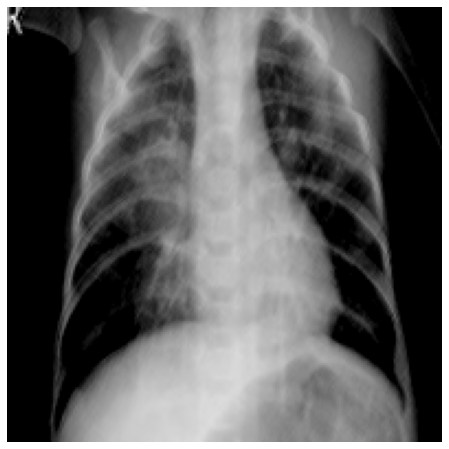

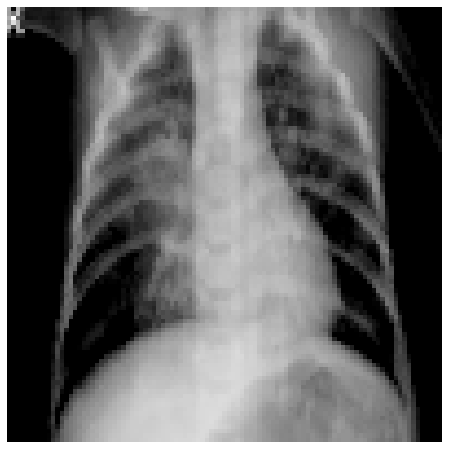

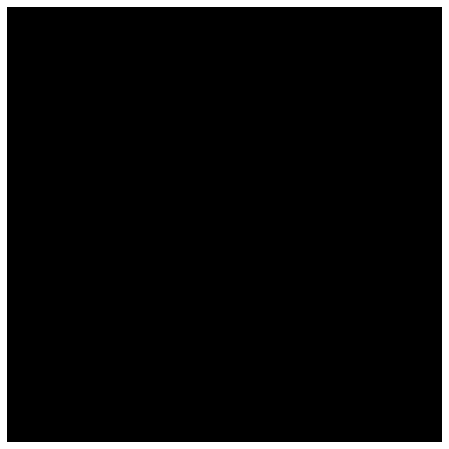

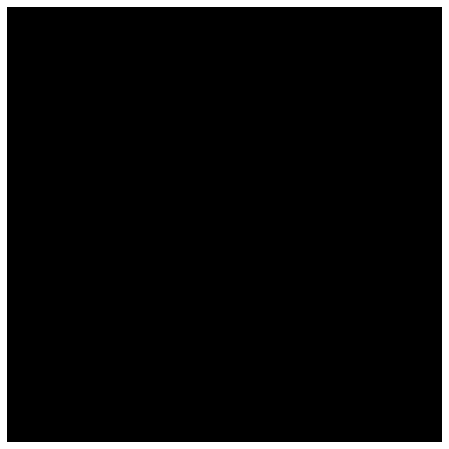

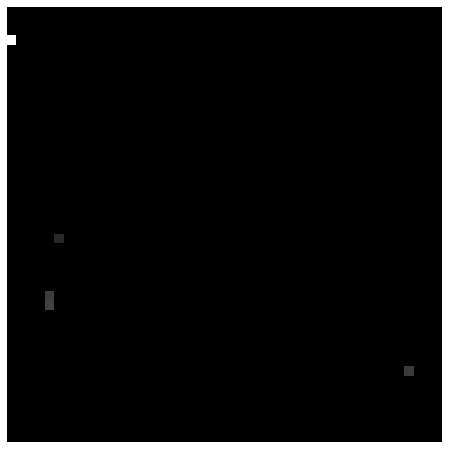

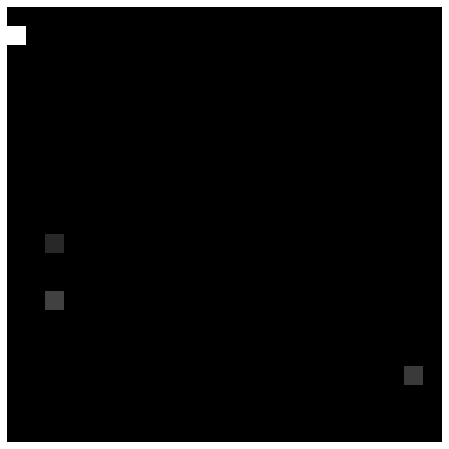

In [ ]:
#select model
model=best_model2
ixs = [0,1, 2, 3,4,5]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

img_covid=X_all[cov_index]
#expanded dimensions from a 3D array to a 4D array with the dimensions of [samples, rows, cols, channels], where we only have one sample.
img_covid3 = expand_dims(img_covid, axis=0)
print(img_covid3.shape)
#get the feature map for first hidden layer: calling the model.predict() function and passing in the prepared single image.
feature_maps = model.predict(img_covid3)

# plot the output from each block
for fmap in feature_maps:
  plt.figure(figsize=(8, 8))
  ix = 1
  ax = plt.subplot(1, 1, ix)                          
  plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
  plt.axis('off')
  ix += 1
  plt.show()